In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [2]:
from google.colab import files
uploaded = files.upload()

Saving chatgpt.csv to chatgpt.csv


In [4]:
## Load the dataset
tweets_df = pd.read_csv("chatgpt.csv")

#Display the dataframe's initial rows
tweets_df.head()

FileNotFoundError: ignored

In [5]:
# Step 2: Data Cleaning

# Drop unwanted column (index column)
tweets_df.drop(columns=['Unnamed: 0'], inplace=True)

# Check for missing values
missing_values = tweets_df.isnull().sum()

# Check for duplicates
duplicates = tweets_df.duplicated().sum()

missing_values, duplicates

# Remove duplicates
tweets_df.drop_duplicates(inplace=True)

# Examine the dataframe's form after eliminating duplicates.
tweets_df.shape


(tweets    0
 labels    0
 dtype: int64,
 1671)

(217623, 2)

In [7]:
##Data pre-processing which involves text normalization
#Importing Libraries and Downloading Necessary Data from NLTK:
import nltk
import re
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer,PorterStemmer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#Setting Up Preprocessing Utilities
stop_words = set(stopwords.words('english'))
st = PorterStemmer()
lem = WordNetLemmatizer()

#Utility Function to Check for Alphabetic Characters
def is_alpha(word):
    for part in word.split('-'):
        if not part.isalpha():
            return False

    return True

#Data Cleaning Function
def clean_dataset(text):
    text = re.sub(r'http\S+', '', text) # removing links
    text = re.sub(r'\\n', ' ', text) # removing \\n
    text = re.sub(r"\s*#\S+", "", text) # removing hash tags
    text = re.sub(r"\s*@\S+", "", text) # removing @
    text = text.lower()
    words = [word for word in word_tokenize(text) if is_alpha(word)]
    #words = [st.stem(word) for word in words]
    words = [lem.lemmatize(word) for word in words]

    words = [w for w in words if not w in stop_words]
    text = " ".join(words)

    return text.strip()

#Applying the DataFrame's Cleaning Function
tweets_df.insert(len(tweets_df.columns)-1, "cleaned_tweets", tweets_df['tweets'].apply(clean_dataset))
tweets_df.head()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweets,cleaned_tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language model dialogue,neutral
1,"Try talking with ChatGPT, our new AI system wh...",try talking chatgpt new ai system optimized di...,good
2,ChatGPT: Optimizing Language Models for Dialog...,chatgpt optimizing language model dialogue tre...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",thrilled share chatgpt new model optimized dia...,good
4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad


In [8]:
##Exploratory Data Analysis

#Determine the numerical column summary statistics in the given dataset.
summary_statistics = tweets_df.describe()

#Display the summary statistics
summary_statistics

,tweets,cleaned_tweets,labels
count,217623,217623,217623
unique,217622,185449,3
top,#NAME?,chatgpt,bad
freq,2,1483,106695


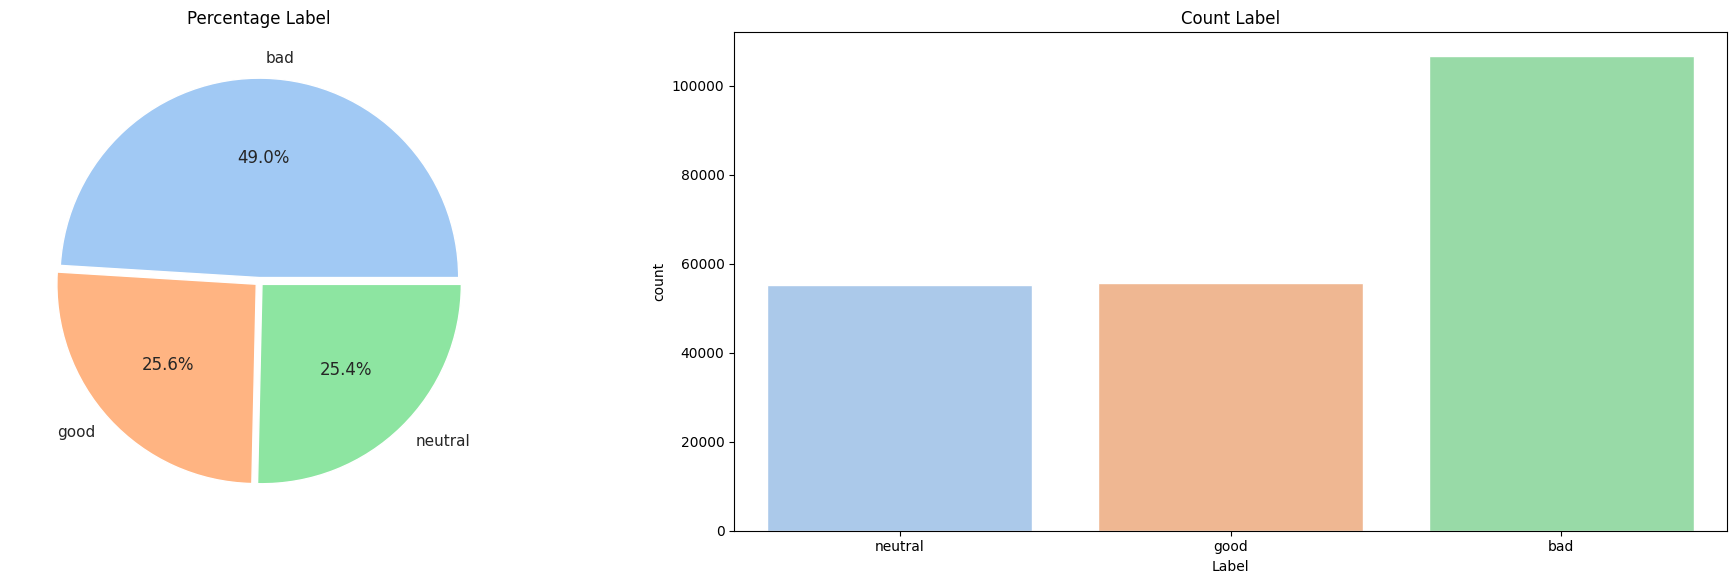

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
label_count = tweets_df['labels'].value_counts()  #Data Preparation
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(6,4)) #Setting Up the Plot Area

sns.set_theme(style='darkgrid', palette='pastel') #Configuring Seaborn Theme
color = sns.color_palette(palette='pastel')

#Create pie chart
explode = [0.02]*len(label_count)
axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

# Plot countplot (bar chart)
sns.countplot(data=tweets_df, x='labels', ax=axes[1])  # Use 'labels' column directly without converting to float
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
plt.tight_layout()
plt.show()

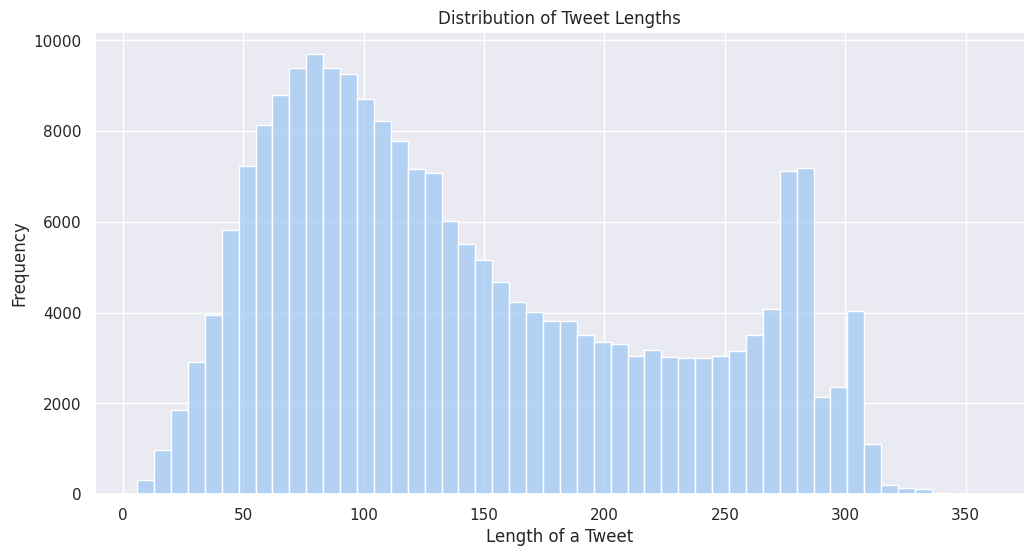

count    217623.000000
mean        145.165520
std          79.913601
min           6.000000
25%          80.000000
50%         125.000000
75%         207.000000
max         357.000000
Name: tweet_length, dtype: float64

In [ ]:
#Tweet length calculation
tweets_df['tweet_length'] = tweets_df['tweets'].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(6, 4))
sns.histplot(tweets_df['tweet_length'], bins=50, kde=False)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of a Tweet')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics of tweet lengths
tweet_length_stats = tweets_df['tweet_length'].describe()
tweet_length_stats


<ipython-input-11-efcfa1dbebae>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tweets_df, x='tweet_length', hue='labels', shade=True)
<ipython-input-11-efcfa1dbebae>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tweets_df, x='char_count', hue='labels', shade=True)


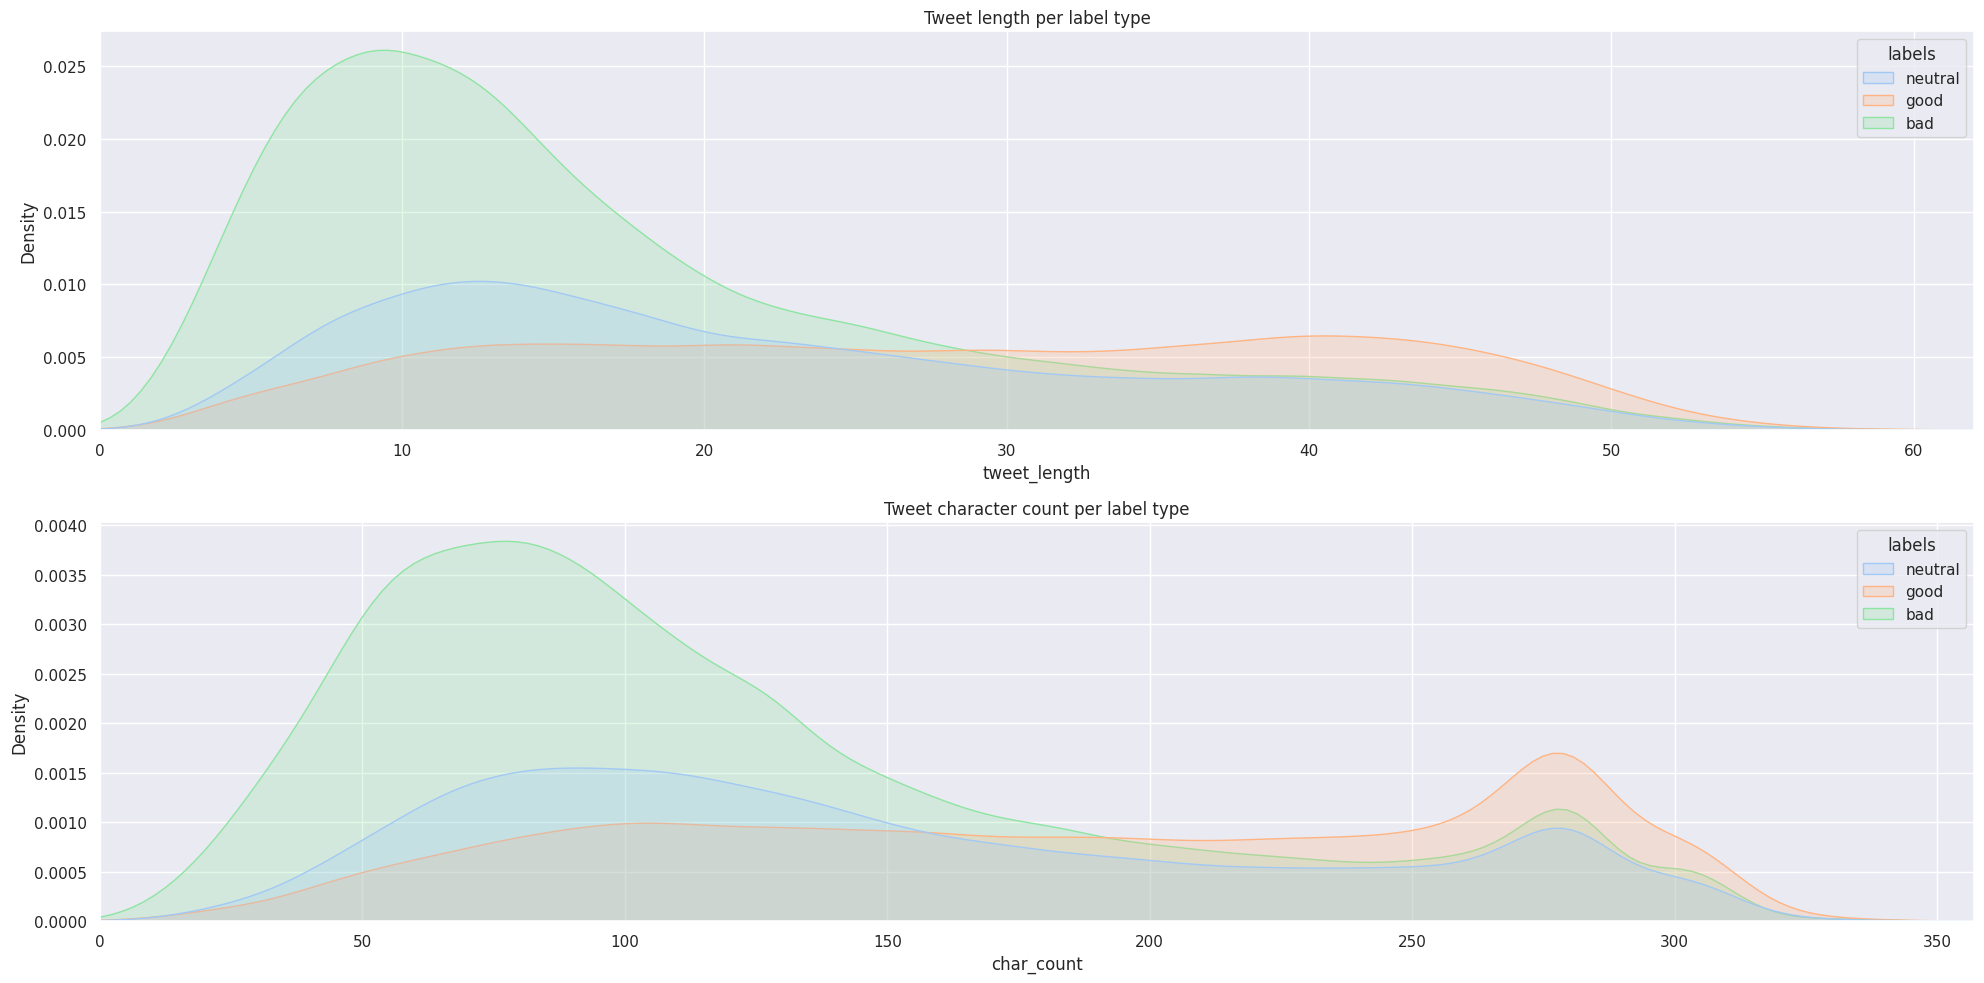

In [ ]:
# Determine the word count of tweets to figure out their length.
tweets_df['tweet_length'] = tweets_df['tweets'].apply(lambda x: len(x.split()))

# Determine how many characters each tweet has.
tweets_df['char_count'] = tweets_df['tweets'].apply(len)

# Show the revised dataframe with the additional columns.
tweets_df[['tweet_length', 'char_count']].head()

import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(6,4))

# KDE Plot creation for tweet length
plt.subplot(2,1,1)
sns.kdeplot(data=tweets_df, x='tweet_length', hue='labels', shade=True)
plt.title('Tweet length per label type')
plt.xlim(0, tweets_df['tweet_length'].max())  # Set the x-axis limit to the max tweet length

# KDE Plot creation for character count
plt.subplot(2,1,2)
sns.kdeplot(data=tweets_df, x='char_count', hue='labels', shade=True)
plt.title('Tweet character count per label type')
plt.xlim(0, tweets_df['char_count'].max())  # Set the x-axis limit to the max character count

# Display Plots
plt.tight_layout()  # Adjust the layout
plt.show()



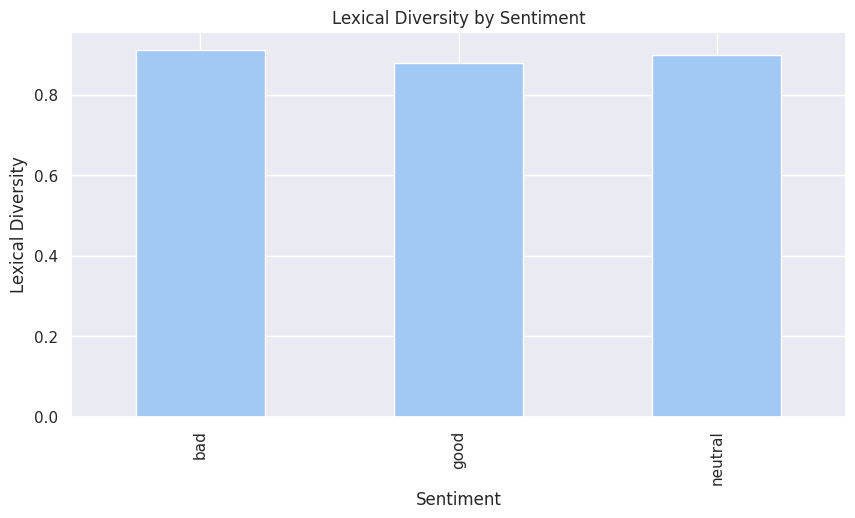

In [ ]:
# 4. Lexical Diversity
# Function Definition
def lexical_diversity(text):
    tokens = word_tokenize(text)
    return len(set(tokens)) / len(tokens) if tokens else 0

tweets_df['lexical_diversity'] = tweets_df['tweets'].apply(lexical_diversity) #Applying Lexical Diversity Function to DataFrame

average_diversity_by_sentiment = tweets_df.groupby('labels')['lexical_diversity'].mean() #Finding the Average Lexical Diversity Based on Sentiment

# Plot lexical diversity by sentiment
average_diversity_by_sentiment.plot(kind='bar', figsize=(6, 4))
plt.title('Lexical Diversity by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Lexical Diversity')
plt.show()

In [7]:
##Positive Word cloud
from wordcloud import WordCloud
# Download the stopwords from NLTK
nltk.download('stopwords')

# Now that the stopwords are downloaded, we can try creating the word cloud again
# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Filter out the positive tweets
positive_tweets = tweets_df[tweets_df['labels'] == 'good']

# Clean the positive tweets
positive_tweets['cleaned_tweets'] = positive_tweets['tweets'].apply(clean_dataset)

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(" ".join(positive_tweets['cleaned_tweets']))

# Plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##Negative Word Cloud
# Filter out the negative tweets
negative_tweets = tweets_df[tweets_df['labels'] == 'bad']

# Clean the negative_tweets
negative_tweets['cleaned_tweets'] = negative_tweets['tweets'].apply(clean_dataset)

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(" ".join(negative_tweets['cleaned_tweets']))

# Plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

NameError: ignored

In [9]:
from sklearn.model_selection import train_test_split # For splitting the dataset into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer # To transform textual data into a numerical representation

#  Feature Engineering - TF-IDF
# Create a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 words to keep the feature space manageable

# Apply the TF-IDF vectorizer to the 'cleaned_tweets' column of the dataset
X_tfidf = tfidf_vectorizer.fit_transform(tweets_df['cleaned_tweets'])

In [10]:
#  Data preparation for training
#  Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, tweets_df['labels'], test_size=0.2, random_state=42)

In [1]:
##Logisic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
#  Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

#  Predict on the testing set
y_pred = logistic_model.predict(X_test)
#  Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))



NameError: ignored

In [14]:
#Confusion matrix of Logistic Regression

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Start time for training
start_train_time = time.time()

# Train the model
logistic_model.fit(X_train, y_train)

# End time for training
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Start time for prediction
start_pred_time = time.time()

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

# End time for prediction
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
##Multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss

#  Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

#  Predict on the testing set
y_pred_nb = nb_model.predict(X_test)

#  Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy (Naive Bayes): {accuracy_nb}')
print(classification_report(y_test, y_pred_nb))



Accuracy (Naive Bayes): 0.7193796668581275
              precision    recall  f1-score   support

         bad       0.74      0.96      0.83     21536
        good       0.74      0.66      0.70     11083
     neutral       0.59      0.31      0.40     10906

    accuracy                           0.72     43525
   macro avg       0.69      0.64      0.65     43525
weighted avg       0.70      0.72      0.69     43525



In [18]:
#Performance Evaluation

#Function to evaluate performance of naive bayes model
def evaluate_naive_bayes(model, X_test, y_test):
    # Start the timer
    start_time = time.time()

    # Predict probabilities
    # If X_test is a sparse matrix, convert it to a dense matrix format
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    proba = model.predict_proba(X_test)

    # Calculate the evaluation runtime
    eval_runtime = time.time() - start_time

    # Calculate the number of samples processed per second
    eval_samples_per_second = X_test.shape[0] / eval_runtime

    # Calculate log loss (cross-entropy loss)
    # Convert y_test to a dense matrix format if it is sparse
    if hasattr(y_test, "toarray"):
        y_test = y_test.toarray()
    eval_loss = log_loss(y_test, proba)


    # Return a dictionary containing the evaluation metrics
    return {
        'eval_loss': eval_loss,
        'eval_runtime': eval_runtime,
        'eval_samples_per_second': eval_samples_per_second,
    }

# Now, evaluate the Naive Bayes model
evaluation_results = evaluate_naive_bayes(nb_model, X_test, y_test)

# Print the evaluation results
print(evaluation_results)






{'eval_loss': 0.7515831700960877, 'eval_runtime': 6.568850755691528, 'eval_samples_per_second': 6625.968775784427}


Confusion Matrix (Naive Bayes):
[[20659   417   460]
 [ 1876  7276  1931]
 [ 5416  2114  3376]]


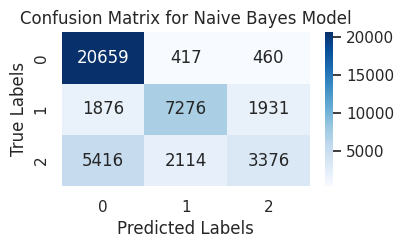

In [ ]:
#Confusion matrix of Multinomial Naive Bayes model


#  Compute the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# print the confusion matrix
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

# Compute the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_nb, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [15]:
## Linear Support Vector Machine

from sklearn.svm import LinearSVC

# Train the LinearSVC model
linear_svc_model = LinearSVC()
linear_svc_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_linear_svc = linear_svc_model.predict(X_test)

# Evaluate the model's performance
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
print(f'Accuracy (LinearSVC): {accuracy_linear_svc}')
print(classification_report(y_test, y_pred_linear_svc))



Accuracy (LinearSVC): 0.831476163124641
              precision    recall  f1-score   support

         bad       0.87      0.95      0.91     21536
        good       0.80      0.85      0.83     11083
     neutral       0.77      0.57      0.65     10906

    accuracy                           0.83     43525
   macro avg       0.81      0.79      0.80     43525
weighted avg       0.83      0.83      0.82     43525



In [23]:
#Performance Evaluation

#Function to evaluate performance
def evaluate_linear_svc(model, X_test, y_test):
    # Start the timer
    start_time = time.time()

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation runtime
    eval_runtime = time.time() - start_time

    # Calculate the number of samples processed per second
    # Use .shape[0] to get the number of rows in X_test
    eval_samples_per_second = X_test.shape[0] / eval_runtime

    return {
        'eval_runtime': eval_runtime,
        'eval_samples_per_second': eval_samples_per_second,
    }

# Now, evaluate the LinearSVC model
evaluation_results = evaluate_linear_svc(linear_svc_model, X_test, y_test)

# Print the evaluation results
print(evaluation_results)




{'eval_runtime': 0.016523361206054688, 'eval_samples_per_second': 2634149.278540921}


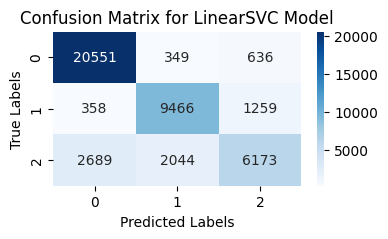

In [26]:
#Confusion Matrix of LinearSVC

# Compute the confusion matrix
conf_matrix_linear_svc = confusion_matrix(y_test, y_pred_linear_svc)

# Plot the heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_linear_svc, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for LinearSVC Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [28]:
##Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Launch the Random Forest classification system
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Generate a classification report
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)


Random Forest Accuracy: 81.04%
              precision    recall  f1-score   support

         bad       0.90      0.89      0.90     21536
        good       0.76      0.79      0.77     11083
     neutral       0.68      0.67      0.68     10906

    accuracy                           0.81     43525
   macro avg       0.78      0.78      0.78     43525
weighted avg       0.81      0.81      0.81     43525



In [33]:
#Performance Evaluation

#function to evaluate performance of the model
def evaluate_random_forest(model, X_test, y_test):
    # Start the timer
    start_time = time.time()

    # Predict probabilities
    proba = model.predict_proba(X_test)

    # Convert y_test to one-hot encoding if it's not already
    y_test_one_hot = pd.get_dummies(y_test).values

    # Calculate the evaluation runtime
    eval_runtime = time.time() - start_time

    # Calculate the number of samples processed per second
    eval_samples_per_second = X_test.shape[0] / eval_runtime

    # Calculate log loss (cross-entropy loss)
    eval_loss = log_loss(y_test_one_hot, proba)

    return {
        'eval_loss': eval_loss,
        'eval_runtime': eval_runtime,
        'eval_samples_per_second': eval_samples_per_second,
    }

# Now, evaluate the Random Forest model
evaluation_results = evaluate_random_forest(rf_classifier, X_test, y_test)

# Print the evaluation results
print(evaluation_results)




{'eval_loss': 0.5598589084440407, 'eval_runtime': 12.77096152305603, 'eval_samples_per_second': 3408.1223971603254}


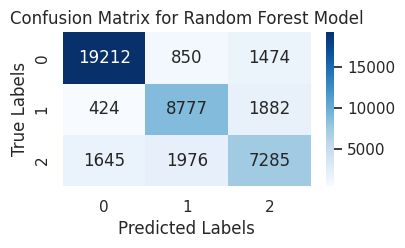

In [ ]:
#Confusion matrix of RF model

# Compute the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Step 2: Plot the heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [3]:
##DistilBERT Model

#Setup and imports
!pip install transformers
!pip install accelerate -U

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.3 MB/s eta 0:00:00


In [18]:
#Data pre-processing and tokenization
# Count the number of unique labels/classes in your dataset
num_classes = tweets_df['labels'].nunique()

# Initialize tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_classes)



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to the  label data and transform the labels to integers
tweets_df['encoded_labels'] = label_encoder.fit_transform(tweets_df['labels'])

# Now the labels are encoded as integers



In [20]:
#Custom data set creation
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure labels are long type
        return item

    def __len__(self):
        return len(self.labels)

# Using the new 'encoded_labels' for the dataset
dataset = TweetDataset(tweets_df['cleaned_tweets'].tolist(), tweets_df['encoded_labels'].tolist(), tokenizer)


In [21]:
#splitting the dataset
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)


In [22]:
#Model training setup
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

In [ ]:
#Model Evaluation
trainer.evaluate()


from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Using the test dataset to get the predictions
predictions = trainer.predict(test_dataset)

# Compute metrics
metrics = compute_metrics(predictions)

# Print the metrics
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-Score:", metrics['f1'])

In [ ]:
#Saving the model
model.save_pretrained('./my_model')
tokenizer.save_pretrained('./my_model')


In [ ]:
# Confusion matrix of DistilBERT

# Extracting the actual labels and predicted labels
actual_labels = predictions.label_ids
predicted_labels = np.argmax(predictions.predictions, axis=1)

#  Create the confusion matrix
conf_matrix_distilbert = confusion_matrix(actual_labels, predicted_labels)

#  Plot the heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_distilbert, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for DistilBERT Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
